In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import networkx as nx 
import pandas as pd 

In [2]:
a = np.load("./a.npy")
u = np.load("./u.npy")
b = np.load("./b.npy")

In [3]:
disease = pd.DataFrame(pd.read_csv('disease.csv'))
disease 

,id,lb,desc
0,0,001,infectious and parasitic diseases
1,1,140,neoplasms
2,2,240,metabolic diseases
3,3,280,diseases of the blood and blood-forming organs
4,4,290,mental disorders
5,5,320,neurologic disease
6,6,390,acute rheumatic fever
7,7,393,chronic rheumatic heart disease
8,8,401,hypertensive disease
9,9,410,ischemic heart disease


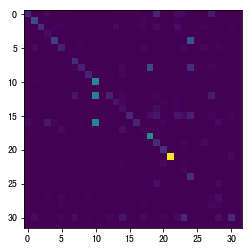

In [4]:
%matplotlib inline 

plt.imshow(a)

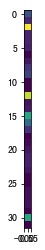

In [5]:
plt.imshow(u)

In [6]:
b

array(7.92308799)

In [7]:
Graphs = []

for i in range(a.shape[0]):
    Gi = nx.DiGraph()
    for j in range(a.shape[1]):
        if a[j][i] > 0.03: 
            Gi.add_edge(i, j, weight=a[j][i])
        
    Graphs.append(Gi)

In [8]:
def draw(G):
    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]

    nx.draw(
        G,
        nx.layout.spring_layout(G),
        edges=edges,
        width=2,
        edge_color=weights,
        node_color='#D88D8D',
        edge_cmap=plt.cm.RdPu,
        with_labels=True,
        arrowstyle='->',
        arrowsize=10,
    )

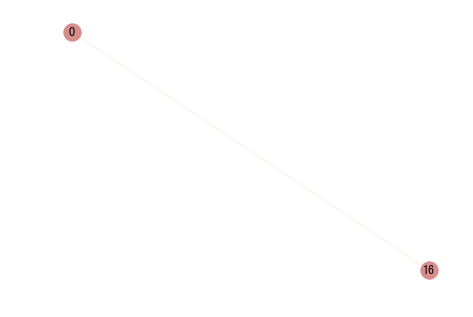

In [9]:
draw(Graphs[0])

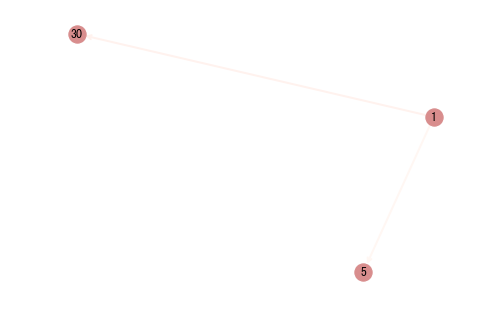

In [10]:
draw(Graphs[1])

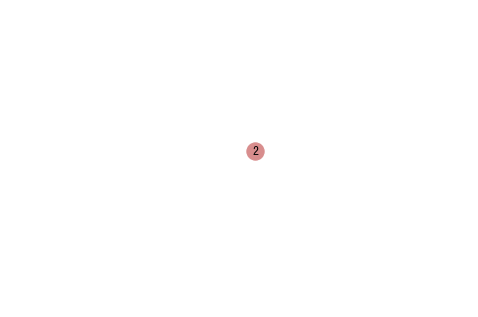

In [15]:
draw(Graphs[3])

In [11]:
G = nx.DiGraph()

In [12]:
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        if a[i][j] > 0.01 and i != j:
            G.add_edge(j, i, weight=np.log(a[i][j]))

In [13]:
# pos = nx.spring_layout(G, k=20)

edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

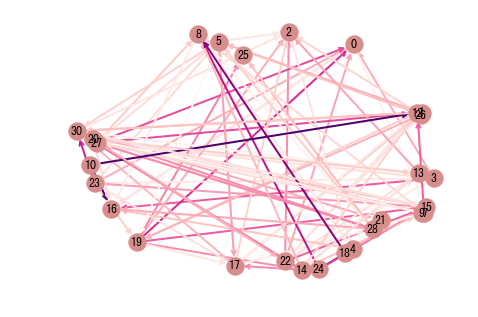

In [14]:
nx.draw(
    G,
    nx.layout.spring_layout(G),
    edges=edges,
    width=2,
    edge_color=weights,
    node_color='#D88D8D',
    edge_cmap=plt.cm.RdPu,
    with_labels=True,
    arrowstyle='->',
    arrowsize=10,
)